In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # elimina los errres de que van a cambiar

# importamos las librerías que necesitamos
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

from word2number import w2n

In [15]:
#cargar csv
df_flight = pd.read_csv("Customer Flight Activity.csv")
df_flight.head(1)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0


In [16]:
#duplicados del csv
df_flight.duplicated().sum()

np.int64(1864)

In [17]:
#Eliminar duplicados csv Customer Flight Activity
def eliminar_duplicados_csv(ruta_archivo, ruta_salida):
    
    #cargar datos 
    df_flight = pd.read_csv(ruta_archivo)
        
    #número de filas antes de eliminar duplicados
    num_filas_antes = len(df_flight)
    print(f"Número de filas antes de eliminar duplicados: {num_filas_antes}")
    
    #eliminar duplicados
    df_flight_sin_duplicados = df_flight.drop_duplicates()
    
    #número de filas después de eliminar duplicados
    num_filas_despues = len(df_flight_sin_duplicados)
    print(f"Número de filas después de eliminar duplicados: {num_filas_despues}")
    
    # Guardar el df sin duplicados 
    df_flight_sin_duplicados.to_csv(ruta_salida, index=False)

    return df_flight_sin_duplicados    

#llamada a la funcion
ruta_archivo = 'Customer Flight Activity.csv'  
ruta_salida = 'Customer_Flight_Activity_Sin_Duplicados.csv'  
df_flight_sin_duplicados  = eliminar_duplicados_csv(ruta_archivo, ruta_salida)


Número de filas antes de eliminar duplicados: 405624
Número de filas después de eliminar duplicados: 403760


In [18]:
#cargar csv 2
df_customer = pd.read_csv("Customer Loyalty History.csv")
df_customer.head(1)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN


In [19]:
#gestion de nulos csv Customer Loyalty History
# cargar el csv
df_customer = pd.read_csv("Customer_Loyalty_History_limpio.csv")
df_customer.head(3)



,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


In [20]:
#porcentaje de nulos que tenemos para cada columna
porcentaje_nulos = (df_customer.isnull().sum() / df_customer.shape[0]) * 100
porcentaje_nulos

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [21]:
# convertir a df
df_customer_nulos = pd.DataFrame(porcentaje_nulos, columns = ["%_nulos"])

# filtramos el DataFrame por columnas que tengan nulos
df_customer_nulos[df_customer_nulos["%_nulos"] > 0]

,%_nulos
Salary,25.321145
Cancellation Year,87.650117
Cancellation Month,87.650117


In [22]:
# columnas categóricas que tienen nulos
nulos_categoricas= df_customer[df_customer.columns[df_customer.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son")
print(nulos_categoricas)

Las columnas categóricas que tienen nulos son
Index([], dtype='object')


In [23]:
#columnas numericas que tienen nulos
nulos_numericas = df_customer[df_customer.columns[df_customer.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son")
print(nulos_numericas)

Las columnas numéricas que tienen nulos son
Index(['Salary', 'Cancellation Year', 'Cancellation Month'], dtype='object')


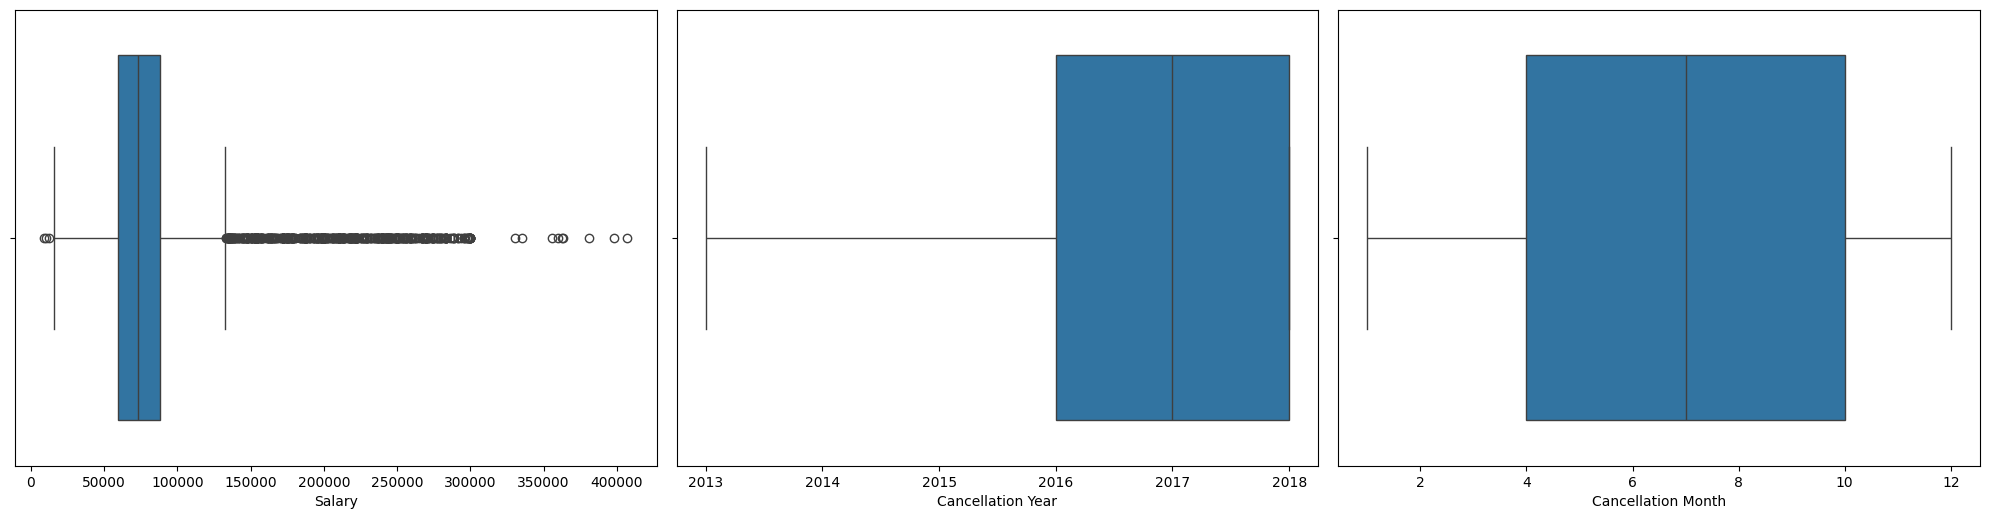

In [24]:
#columnas donde tenemos valores atípicos
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_numericas):
    sns.boxplot(x = col, data = df_customer, ax = axes[indice])
# Eliminar ejes vacíos
for i in range(len(nulos_numericas), len(axes)):
    fig.delaxes(axes[i])    

plt.tight_layout()
plt.show()

In [25]:
# Salary con la mediana
df_customer['Salary'] = df_customer['Salary'].fillna(df_customer['Salary'].median())

In [26]:
# Cancellation Year y Cancellation Month con 0
df_customer['Cancellation Year'] = df_customer['Cancellation Year'].fillna(0)
df_customer['Cancellation Month'] = df_customer['Cancellation Month'].fillna(0)

In [35]:
df_customer.to_csv("Customer_Loyalty_History_nonull.csv")
df_customer.head(1)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0,0


In [28]:
#convertir de object a numerico csv Customer Loyalty History
# columnas a convertir a numerico  
columnas_a_convertir_a_int = ["Enrollment Year", "Enrollment Month", "Cancellation Year", "Cancellation Month"]
for col in columnas_a_convertir_a_int:
    df_customer[col] = df_customer[col].astype(int)

# Columna a convertir a valores positivos
columna_a_convertir_a_positivo = "Salary"  
df_customer[columna_a_convertir_a_positivo] = df_customer[columna_a_convertir_a_positivo].abs()
    
   

In [29]:
df_customer.to_csv("Customer_Loyalty_History_limpio_nonulls.csv")

In [30]:
#forma de csv originales

print(f"las filas y columnas que tenemos en el df flight son {df_flight_sin_duplicados.shape}")

print(f"las filas y columnas que tenemos en el df customer son {df_customer.shape}")


las filas y columnas que tenemos en el df flight son (403760, 10)
las filas y columnas que tenemos en el df customer son (16737, 16)


In [31]:
#unir los dos csv
# Unir los df por el índice
df_unido = df_flight_sin_duplicados.join(df_customer, how='inner', lsuffix='flight')

# Guardar el DataFrame combinado en un nuevo archivo CSV
df_unido.to_csv('Customer_Flight_Loyalty_unido.csv')

In [32]:
df_unido.head(1)

,Loyalty Numberflight,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0,0


In [33]:
df_unido.duplicated().sum()

np.int64(0)

In [34]:
df_unido.isnull().sum()

Loyalty Numberflight           0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Loyalty Number                 0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
dtype: int64